In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-05-07 12:06:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-05-07 12:06:17 (92.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data,create_tensorboard_callback,plot_loss_curves,compare_historys

In [ ]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2023-05-07 12:08:24--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.103.128, 108.177.120.128, 142.251.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.103.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.009s  

2023-05-07 12:08:24 (61.5 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



###**Load Data**

In [ ]:
unzip_data("nlp_getting_started.zip")

In [ ]:
import pandas as pd
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [ ]:
train_data.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many samples total?
print(f"Total training samples: {len(train_data)}")
print(f"Total test samples: {len(test_data)}")
print(f"Total samples: {len(train_data) + len(test_data)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [ ]:

train_data_shuffled=train_data.sample(frac=1,random_state=42)
train_data_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


###**visualise random sample from shuffled dataset**

In [ ]:

import random
random_index=random.randint(0,len(train_data)-5)
for row in train_data_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target=row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"text:\n{text}\n")
  print("---\n")



Target: 1 (real disaster)
text:
Japan marks 70th anniversary of Hiroshima atomic bombing http://t.co/a2SS7pr4gW

---

Target: 1 (real disaster)
text:
Firefighters Headed To California To Fight Wild Fires http://t.co/J2PYkYo0EN

---

Target: 1 (real disaster)
text:
Urgent! Save the Salt River #WildHorses! Mass murder by the very ppl supposed to protect them?  --&gt; http://t.co/14wH0pJJ2C @CNN @CBC

---

Target: 0 (not real disaster)
text:
#SBNation #Flames What Makes a Good Penalty Killer? http://t.co/xYi5fDacxO http://t.co/SjtvzgGcXU

---

Target: 0 (not real disaster)
text:
How is it one careless match can start a forest fire but it takes a whole box to start a campfire

---



###**split Data into train and valiadation**

In [ ]:
train_data_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_data_shuffled["text"].to_numpy(),
                                                                         train_data_shuffled["target"].to_numpy(),
                                                                         test_size=0.10,
                                                                         random_state=42)

In [ ]:
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

In [ ]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [ ]:
train_labels[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

###**Converting data into numbers**

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
text_vectorizer=TextVectorization(max_tokens=None, 
                                  standardize='lower_and_strip_punctuation', 
                                  split='whitespace', 
                                  ngrams=None, 
                                  output_mode='int',
                                  output_sequence_length=None, 
                                  pad_to_max_tokens=False, 
                                  vocabulary=None, 
                                  idf_weights=None, 
                                  sparse=False, 
                                  ragged=False, 
                                  encoding='utf-8')

In [ ]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
max_length=15
max_vocab=1000
text_vectorizer=TextVectorization(max_tokens=max_vocab,
                                  output_mode="int",
                                  output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 1000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['reported', 'r', 'pray', 'playlist', 'patience']


###**Creating an Embedding using an Embedding Layer**

In [ ]:
import tensorflow as tf
embeded=tf.keras.layers.Embedding(input_dim=max_vocab,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length, 
                             name="embedding_1") 

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embeded(text_vectorizer([random_sentence]))
sample_embed

Original text:
Today Japan marks 70 yrs since the U.S (A) bombed 2 cities killing over 120000 people But we have to worry about Iran http://t.co/FcIXk23XQH      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00834695,  0.02223014, -0.02538961, ..., -0.01665755,
          0.04311023, -0.032796  ],
        [ 0.0035473 , -0.01507983,  0.00378739, ...,  0.01586357,
          0.03492026, -0.00505846],
        [-0.04064956,  0.02377361, -0.0484982 , ..., -0.02894635,
          0.01086203, -0.01415224],
        ...,
        [ 0.01637235, -0.02921346, -0.01732587, ..., -0.03078576,
         -0.01814194, -0.04853221],
        [-0.00128489,  0.01411059,  0.04246675, ...,  0.00433479,
         -0.02942046, -0.02450413],
        [ 0.01637235, -0.02921346, -0.01732587, ..., -0.03078576,
         -0.01814194, -0.04853221]]], dtype=float32)>

#**creating model**
###Model 0: Naive Bayes (baseline)
###Model 1: Feed-forward neural network (dense model)
###Model 2: LSTM model
###Model 3: GRU model
###Model 4: Bidirectional-LSTM model
###Model 5: 1D Convolutional Neural Network
###Model 6: TensorFlow Hub Pretrained Feature Extractor
###Model 7: Same as model 6 with 10% of training data

###**Model 0: Naive Bayes (baseline)**

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), 
                    ("clf", MultinomialNB()) 
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
baseline_preds=model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

####**Model_0_Results**

In [ ]:
baseline_results=calculate_results(val_labels,baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

##**Model 1: Feed-forward neural network (dense model)**

In [ ]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
from tensorflow.keras import layers

In [ ]:
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embeded(x)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model_1=tf.keras.Model(inputs,outputs,name="Model_1_Dense")

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "Model_1_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           128000    
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 128,129
Trainable params: 128,129
Non-t

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_sentences, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230507-135000
Epoch 1/5
215/215 [==============================] - 5s 12ms/step - loss: 0.6182 - accuracy: 0.6755 - val_loss: 0.5598 - val_accuracy: 0.7244
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.4920 - accuracy: 0.7805 - val_loss: 0.5010 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4377 - accuracy: 0.8075 - val_loss: 0.4910 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.4113 - accuracy: 0.8189 - val_loss: 0.4855 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3946 - accuracy: 0.8262 - val_loss: 0.4892 - val_accuracy: 0.7769


In [ ]:
model_1_score = model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 6ms/step - loss: 0.4892 - accuracy: 0.7769


In [ ]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

24/24 [==============================] - 0s 5ms/step


array([[0.5375914 ],
       [0.7114953 ],
       [0.9719522 ],
       [0.10394037],
       [0.13503799],
       [0.9213921 ],
       [0.87437314],
       [0.8385672 ],
       [0.7346827 ],
       [0.16110693]], dtype=float32)

In [ ]:
model_1_preds=tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

###**Model_1_Results**

In [ ]:
model_1_results=calculate_results(val_labels,model_1_preds)
model_1_results

{'accuracy': 76.11548556430446,
 'precision': 0.7639062094795714,
 'recall': 0.7611548556430446,
 'f1': 0.758270611394164}

##**Model 2: LSTM model**

In [ ]:
model_2_embeded=tf.keras.layers.Embedding(input_dim=max_vocab,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length, 
                             name="embedding_2") 

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embeded(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [ ]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           128000    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 177,473
Trainable params: 177,473
Non-trainable params: 0
________________________________________________

In [ ]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20230507-140432
Epoch 1/5
215/215 [==============================] - 13s 35ms/step - loss: 0.5302 - accuracy: 0.7338 - val_loss: 0.4803 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.4183 - accuracy: 0.8146 - val_loss: 0.4793 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3874 - accuracy: 0.8291 - val_loss: 0.4890 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 6s 26ms/step - loss: 0.3652 - accuracy: 0.8406 - val_loss: 0.4985 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 7s 30ms/step - loss: 0.3402 - accuracy: 0.8594 - val_loss: 0.5384 - val_accuracy: 0.7612


In [ ]:
model_2_score = model_2.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 10ms/step - loss: 0.5384 - accuracy: 0.7612


In [ ]:
# Make predictions (these come back in the form of probabilities)
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10] # only print out the first 10 prediction probabilities

24/24 [==============================] - 1s 6ms/step


array([[0.6230474 ],
       [0.23482381],
       [0.9818081 ],
       [0.08584336],
       [0.13913298],
       [0.9974347 ],
       [0.9159871 ],
       [0.92399526],
       [0.8716451 ],
       [0.11782126]], dtype=float32)

In [ ]:
model_2_preds=tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

####**Model_2_Results**

In [ ]:
model_2_results=calculate_results(val_labels,model_2_preds)
model_2_results

{'accuracy': 76.11548556430446,
 'precision': 0.7639062094795714,
 'recall': 0.7611548556430446,
 'f1': 0.758270611394164}

##**Model 3: GRU model**

In [ ]:
model_3_embeded=tf.keras.layers.Embedding(input_dim=max_vocab,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length, 
                             name="embedding_3") 

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embeded(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.GRU(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

(None, 15, 128)
(None, 64)


In [ ]:
# Compile model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "model_3_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           128000    
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 165,313
Trainable params: 165,313
Non-trainable params: 0
________________________________________________

In [ ]:
# Fit model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20230507-141709
Epoch 1/5
215/215 [==============================] - 4s 21ms/step - loss: 0.2446 - accuracy: 0.9025 - val_loss: 0.6975 - val_accuracy: 0.7467
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2291 - accuracy: 0.9096 - val_loss: 0.7071 - val_accuracy: 0.7507
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2070 - accuracy: 0.9204 - val_loss: 0.8169 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2010 - accuracy: 0.9219 - val_loss: 0.7741 - val_accuracy: 0.7493
Epoch 5/5
215/215 [==============================] - 5s 22ms/step - loss: 0.1864 - accuracy: 0.9251 - val_loss: 0.8655 - val_accuracy: 0.7480


In [ ]:
model_3_score = model_3.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.8655 - accuracy: 0.7480


In [ ]:
# Make predictions (these come back in the form of probabilities)
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10] # only print out the first 10 prediction probabilities

24/24 [==============================] - 0s 4ms/step


array([[0.9983801 ],
       [0.97607934],
       [0.99958676],
       [0.16269301],
       [0.00688076],
       [0.9999152 ],
       [0.98938555],
       [0.99579155],
       [0.9710088 ],
       [0.29373828]], dtype=float32)

In [ ]:
model_3_preds=tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

####**Model_3_Results**

In [ ]:
model_3_results=calculate_results(val_labels,model_3_preds)
model_3_results

{'accuracy': 74.80314960629921,
 'precision': 0.7476243671645544,
 'recall': 0.7480314960629921,
 'f1': 0.7476983829605197}

##**Model 4: Bidirectional model**

In [ ]:
model_4_embeded=tf.keras.layers.Embedding(input_dim=max_vocab,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length, 
                             name="embedding_4") 

In [ ]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embeded(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.Bidirectional(layers.LSTM(64))(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bi-derectional")

(None, 15, 128)
(None, 128)


In [ ]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "model_3_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           128000    
                                                                 
 gru_2 (GRU)                 (None, 64)                37248     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 165,313
Trainable params: 165,313
Non-trainable params: 0
________________________________________________

In [ ]:
# Fit model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "bi-directional")])

Saving TensorBoard log files to: model_logs/bi-directional/20230507-142506
Epoch 1/5
215/215 [==============================] - 14s 31ms/step - loss: 0.5213 - accuracy: 0.7361 - val_loss: 0.4807 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 7s 32ms/step - loss: 0.4161 - accuracy: 0.8142 - val_loss: 0.4937 - val_accuracy: 0.7703
Epoch 3/5
215/215 [==============================] - 6s 26ms/step - loss: 0.3838 - accuracy: 0.8310 - val_loss: 0.5032 - val_accuracy: 0.7572
Epoch 4/5
215/215 [==============================] - 7s 32ms/step - loss: 0.3567 - accuracy: 0.8463 - val_loss: 0.5184 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 9s 44ms/step - loss: 0.3332 - accuracy: 0.8621 - val_loss: 0.5242 - val_accuracy: 0.7559


In [ ]:
model_4_score = model_4.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 13ms/step - loss: 0.5242 - accuracy: 0.7559


In [ ]:
# Make predictions (these come back in the form of probabilities)
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10] # only print out the first 10 prediction probabilities

24/24 [==============================] - 1s 8ms/step


array([[0.6036884 ],
       [0.4971231 ],
       [0.8882101 ],
       [0.1281079 ],
       [0.17349832],
       [0.99236465],
       [0.6792955 ],
       [0.9312807 ],
       [0.7025449 ],
       [0.17347798]], dtype=float32)

In [ ]:
model_4_preds=tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

####**Model_4_Results**

In [ ]:
model_4_results=calculate_results(val_labels,model_4_preds)
model_4_results

{'accuracy': 75.59055118110236,
 'precision': 0.7650653362986114,
 'recall': 0.7559055118110236,
 'f1': 0.7501825087088133}

##**Model 5: Conv model**

In [ ]:
tf.random.set_seed(42)
model_5_embedding = layers.Embedding(input_dim=max_vocab,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           128000    
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 1)              

In [ ]:
# Fit model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "conv-1D")])

Saving TensorBoard log files to: model_logs/conv-1D/20230507-143408
Epoch 1/5
215/215 [==============================] - 3s 9ms/step - loss: 0.5751 - accuracy: 0.7078 - val_loss: 0.4932 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4186 - accuracy: 0.8152 - val_loss: 0.4794 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3645 - accuracy: 0.8413 - val_loss: 0.4973 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.3246 - accuracy: 0.8666 - val_loss: 0.5171 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.2854 - accuracy: 0.8867 - val_loss: 0.5624 - val_accuracy: 0.7743


In [ ]:
model_5_score = model_5.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.5624 - accuracy: 0.7743


In [ ]:
# Make predictions (these come back in the form of probabilities)
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10] # only print out the first 10 prediction probabilities

24/24 [==============================] - 0s 3ms/step


array([[0.6046725 ],
       [0.6993236 ],
       [0.8463816 ],
       [0.0239051 ],
       [0.1579484 ],
       [0.99530435],
       [0.82643074],
       [0.8840438 ],
       [0.6527694 ],
       [0.11103915]], dtype=float32)

In [ ]:
model_5_preds=tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

####**Model_5_Results**

In [ ]:
model_5_results=calculate_results(val_labels,model_5_preds)
model_5_results

{'accuracy': 77.42782152230971,
 'precision': 0.7808800469989561,
 'recall': 0.7742782152230971,
 'f1': 0.7702846759539673}

##**Model 6: TensorFlow Hub Pretrained Sentence Encoder**

In [ ]:
import tensorflow_hub as  hub

In [ ]:
embeded=hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [ ]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE") 

In [ ]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230507-144235
Epoch 1/5
215/215 [==============================] - 9s 17ms/step - loss: 0.5051 - accuracy: 0.7830 - val_loss: 0.4469 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4142 - accuracy: 0.8156 - val_loss: 0.4353 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3993 - accuracy: 0.8224 - val_loss: 0.4315 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3921 - accuracy: 0.8272 - val_loss: 0.4270 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3861 - accuracy: 0.8289 - val_loss: 0.4289 - val_accuracy: 0.8176


In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 2s 25ms/step


array([[0.15446933],
       [0.7287592 ],
       [0.98935544],
       [0.19058895],
       [0.72492754],
       [0.68309504],
       [0.9826989 ],
       [0.97920483],
       [0.9254041 ],
       [0.0881136 ]], dtype=float32)

In [ ]:

model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

####**Model_6_Results**

In [ ]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.75853018372703,
 'precision': 0.8202616926815424,
 'recall': 0.8175853018372703,
 'f1': 0.8159820561172786}

##**Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data**

In [ ]:
import numpy as np

In [ ]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [ ]:
print(len(train_sentences))
print(len(train_sentences_10_percent))

6851
686


In [ ]:
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
dtype: int64

In [ ]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20230507-151125
Epoch 1/5
22/22 [==============================] - 9s 53ms/step - loss: 0.6632 - accuracy: 0.7522 - val_loss: 0.6432 - val_accuracy: 0.7257
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5863 - accuracy: 0.8236 - val_loss: 0.5822 - val_accuracy: 0.7441
Epoch 3/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5079 - accuracy: 0.8294 - val_loss: 0.5314 - val_accuracy: 0.7625
Epoch 4/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4464 - accuracy: 0.8353 - val_loss: 0.5036 - val_accuracy: 0.7651
Epoch 5/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4055 - accuracy: 0.8382 - val_loss: 0.4882 - val_accuracy: 0.7703


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 19ms/step


array([[0.24266696],
       [0.7986772 ],
       [0.9109651 ],
       [0.31975797],
       [0.56451666],
       [0.8517697 ],
       [0.82085955],
       [0.85348797],
       [0.85106176],
       [0.11850993]], dtype=float32)

In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

####**Model_7_Results**

In [ ]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 77.03412073490814,
 'precision': 0.7751330918759862,
 'recall': 0.7703412073490814,
 'f1': 0.7668707484010339}

#**Comparing the performance of each of our models**

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,76.115486,0.763906,0.761155,0.758271
lstm,76.115486,0.763906,0.761155,0.758271
gru,74.803150,0.747624,0.748031,0.747698
bidirectional,75.590551,0.765065,0.755906,0.750183
conv1d,77.427822,0.780880,0.774278,0.770285
tf_hub_sentence_encoder,81.758530,0.820262,0.817585,0.815982
tf_hub_10_percent_data,77.034121,0.775133,0.770341,0.766871


In [ ]:
all_model_results["accuracy"]=all_model_results["accuracy"]/100

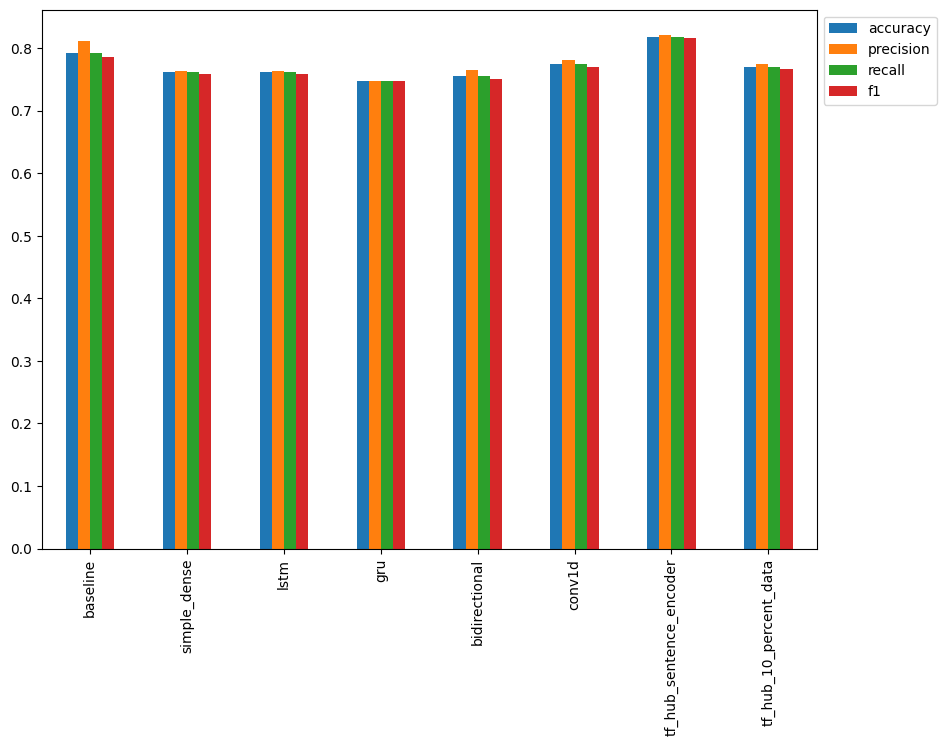

In [ ]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

<Axes: >

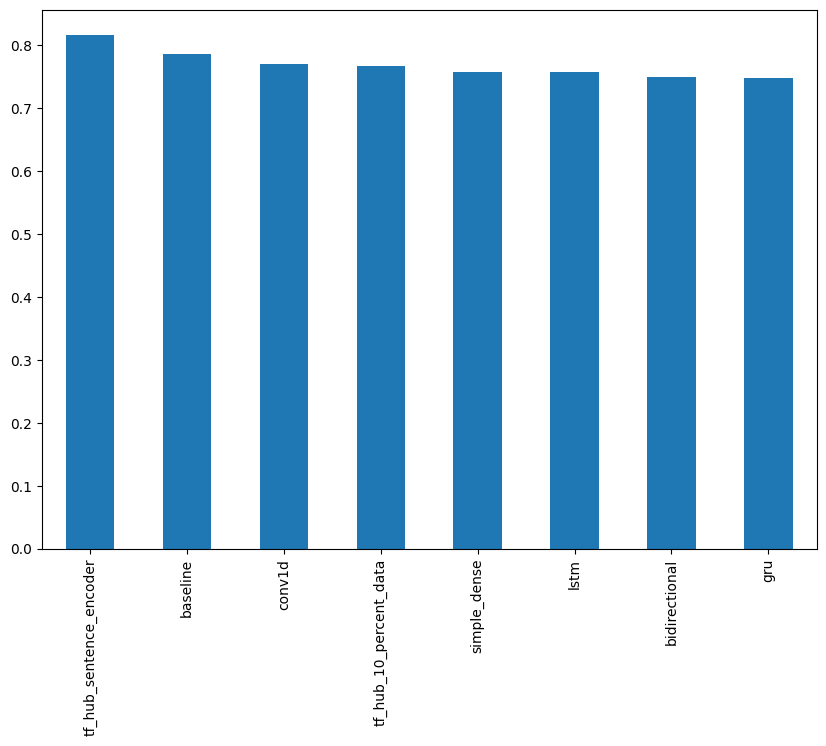

In [ ]:
all_model_results.sort_values("f1",ascending=False)["f1"].plot(kind="bar",figsize=(10,7))

#**model_8 Combining our models (model ensembling/stacking)**

In [ ]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs,axis=1)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0.], dtype=float32)>

In [ ]:
ensemble_results = calculate_results(val_labels, combined_preds)
ensemble_results

{'accuracy': 77.95275590551181,
 'precision': 0.7792465794019963,
 'recall': 0.7795275590551181,
 'f1': 0.7793006345999338}

In [ ]:
all_model_results.head()

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.761155,0.763906,0.761155,0.758271
lstm,0.761155,0.763906,0.761155,0.758271
gru,0.748031,0.747624,0.748031,0.747698
bidirectional,0.755906,0.765065,0.755906,0.750183


In [ ]:
all_model_results.loc["ensemble_results"]=ensemble_results

In [ ]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.761155,0.763906,0.761155,0.758271
lstm,0.761155,0.763906,0.761155,0.758271
gru,0.748031,0.747624,0.748031,0.747698
bidirectional,0.755906,0.765065,0.755906,0.750183
conv1d,0.774278,0.780880,0.774278,0.770285
tf_hub_sentence_encoder,0.817585,0.820262,0.817585,0.815982
tf_hub_10_percent_data,0.770341,0.775133,0.770341,0.766871
ensemble_results,77.952756,0.779247,0.779528,0.779301


In [ ]:
all_model_results.loc["ensemble_results"]["accuracy"]=(all_model_results.loc["ensemble_results"]["accuracy"])/100

In [ ]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.761155,0.763906,0.761155,0.758271
lstm,0.761155,0.763906,0.761155,0.758271
gru,0.748031,0.747624,0.748031,0.747698
bidirectional,0.755906,0.765065,0.755906,0.750183
conv1d,0.774278,0.780880,0.774278,0.770285
tf_hub_sentence_encoder,0.817585,0.820262,0.817585,0.815982
tf_hub_10_percent_data,0.770341,0.775133,0.770341,0.766871
ensemble_results,0.779528,0.779247,0.779528,0.779301


#**Saving and loading a trained model**

In [ ]:
model_6.save("Model_6.h5")

In [ ]:
loaded_model=tf.keras.models.load_model("Model_6.h5",custom_objects={"KerasLayer": hub.KerasLayer})

###**loaded_model_results**

In [ ]:
loaded_model.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4289 - accuracy: 0.8176


[0.42889535427093506, 0.817585289478302]

In [ ]:
model_6_results

{'accuracy': 81.75853018372703,
 'precision': 0.8202616926815424,
 'recall': 0.8175853018372703,
 'f1': 0.8159820561172786}

#**Finding the most wrong examples**

In [ ]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.154469
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.728759
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.989355
3,@camilacabello97 Internally and externally scr...,1,0.0,0.190589
4,Radiation emergency #preparedness starts with ...,1,1.0,0.724928


In [ ]:
most_wrong=val_df[val_df["target"] !=val_df["pred"]].sort_values("pred_prob",ascending=False)

In [ ]:
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.915419
759,FedEx will no longer transport bioterror patho...,0,1.0,0.858994
628,@noah_anyname That's where the concentration c...,0,1.0,0.857788
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.838847
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.827028
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.823172
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.799520
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.791904
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.777859
381,Deaths 3 http://t.co/nApviyGKYK,0,1.0,0.770307


In [ ]:
for row in most_wrong[:10].itertuples():
  _,text,target,pred,prob=row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")



Target: 0, Pred: 1, Prob: 0.9154190421104431
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1, Prob: 0.858993649482727
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1, Prob: 0.8577879667282104
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 0.8388470411300659
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target: 0, Pred: 1, Prob: 0.8270277976989746
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target: 0, Pred: 1, Prob: 0.8231723308563232
Text:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1, Pro

#**Making predictions on the test dataset**

In [ ]:

# Making predictions on the test dataset
test_sentences = test_data["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 70ms/step
Pred: 0, Prob: 0.10439923405647278
Text:
8' MTech Assisted Open RESCUE Pocket Knife - NEW BLUE MT-A801BL zix http://t.co/51n2rZEBis http://t.co/P4lNbjDo0x

----

1/1 [==============================] - 0s 67ms/step
Pred: 1, Prob: 0.7354575991630554
Text:
Ahead of Print: A New Paradigm of Injuries From Terrorist Explosions as a Function of Explosion Setting Type.:... http://t.co/tqQc3yxBoR

----

1/1 [==============================] - 0s 69ms/step
Pred: 0, Prob: 0.09690092504024506
Text:
Keep up the great work Councilman Brian O'Neill http://t.co/ueS3IhSyIq

----

1/1 [==============================] - 0s 62ms/step
Pred: 0, Prob: 0.30705127120018005
Text:
Ignition Knock (Detonation) Sensor-Senso fits 90-96 Subaru Legacy 2.2L-H4 http://t.co/pcCksm1tVM http://t.co/yWzngj7uow

----

1/1 [==============================] - 0s 58ms/step
Pred: 0, Prob: 0.4926575720310211
Text:
Morning Metro Late train? Check. Crazy guy who tells people the doo

#**Making prediction on custom tweet**

In [ ]:
Indian_Pm_tweet = "Began today’s roadshow in Bengaluru by paying tributes to Nadaprabhu Kempegowda Ji.We recall his rich vision and reiterate our commitment to fulfilling it."

In [ ]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [ ]:
predict_on_sentence(model=model_6,sentence=Indian_Pm_tweet)

1/1 [==============================] - 0s 77ms/step
Pred: 0.0 (not real disaster) Prob: 0.19795477390289307
Text:
Began today’s roadshow in Bengaluru by paying tributes to Nadaprabhu Kempegowda Ji.We recall his rich vision and reiterate our commitment to fulfilling it.


In [ ]:
Disaster_Tweet="A heavily Hail storm effected vegetables farming and wheat fields so plz declare bajaur as an disasters area and do some recovery in farmers losse appeal from govrnment"

In [ ]:
predict_on_sentence(model=model_6,sentence=Disaster_Tweet)

1/1 [==============================] - 0s 74ms/step
Pred: 1.0 (real disaster) Prob: 0.8948987722396851
Text:
A heavily Hail storm effected vegetables farming and wheat fields so plz declare bajaur as an disasters area and do some recovery in farmers losse appeal from govrnment
